# Least squares

Given a family of regression models, the least squares solution is the model that minimises the mean squared error on our training dataset. Consider the folowing **multiple linear model**:

$\begin{equation}
f(x) = w_0 + w_1 x_1 + ... + w_K x_K
\end{equation}$

where $x_1, ..., x_K$ are the predictors and $w_0, ..., w_K$ are the model's parameters. If we have a dataset consisting of $N$ samples, we can obtain the parameters of the least squares solution using the **normal equations** 

$\begin{equation}
\mathbf{w} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}
\end{equation}$

where $\mathbf{w}=[w_1, ... , w_K]^T$ are the parameters of the model, $\mathbf{y}=[y_0, ..., y_N]^T$ are the true labels in the dataset and $\mathbf{X}$ is the design matrix. The least squares solution for **simple polynomial regression** can be obtained following an identical approach. Given a polynomial model

$\begin{equation}
f(x) = w_0 + w_1 x + ... + w_K x^K
\end{equation}$

we can treat $x, x^2, ..., x^K$ as separate predictors, build the corresponding design matrix $\mathbf{X}$ and use the normal equation.

As you can see from the normal equations, obtaining the least square solution involves: 

- **Arrays** ($\mathbf{w}$, $\mathbf{y}$ and $\mathbf{X}$).
- **Transposition**.
- **Matrix inversion**.
- **Matrix multiplication**. 

Let's explore a simple regression problem. First, we will define and plot our training dataset, which consists 10 samples described by one predictor `x` and one label `y`.

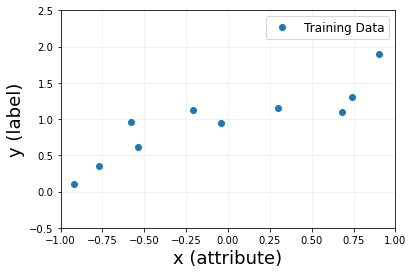

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0.3000, -0.7700, 0.9000, -0.0400, 0.7400, -0.5800, -0.9200, -0.2100, -0.5400, 0.6800], ndmin=2).T
y = np.array([1.1492,  0.3582, 1.9013,  0.9487, 1.3096,  0.9646,  0.1079,  1.1262,  0.6131, 1.0951], ndmin=2).T

plt.plot(x, y, 'o', label="Training Data")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

Note that here we have obtained the transpose of two row vectors using `.T` instead of `np.transpose`. Both options are equivalent. The most important point is that `x` and `y` are two column vectors consisting of 10 rows and 1 column, i.e. 10x1 vectors:

In [2]:
print(x.shape)
print(y.shape)

(10, 1)
(10, 1)


Let's obtain the least squares solution for a simple linear model $f(x) = w_0 + w_1 x$. We need to calculate the design matrix first and then use the normal equation. We will show the calculations involved in the normal equations step by step:

Step 1:  $X^TX$

Step 2: $(X^TX)^{-1}$

Step 3: $(X^TX)^{-1}X^T$

In [3]:
X = np.column_stack([np.ones(x.shape), x])    #column_stack() function is used to stack 1-D arrays as columns into a 2-D array.
#It takes a sequence of 1-D arrays and stack them as columns to make a single 2-D array. 2-D arrays are stacked as-is, just like with hstack function.

print("The design matrix is:\n", X)

XTX = np.dot(X.T, X) # Step 1
XTX_inv = np.linalg.inv(XTX) # Step 2
XTX_invXT = np.dot(XTX_inv, X.T) # Step 3

w = np.dot(XTX_invXT, y)
print("The 2 parameters of the least squares linear solution are\n", w)

The design matrix is:
 [[ 1.    0.3 ]
 [ 1.   -0.77]
 [ 1.    0.9 ]
 [ 1.   -0.04]
 [ 1.    0.74]
 [ 1.   -0.58]
 [ 1.   -0.92]
 [ 1.   -0.21]
 [ 1.   -0.54]
 [ 1.    0.68]]
The 2 parameters of the least squares linear solution are
 [[0.98652316]
 [0.66211737]]


Now that we have the parameters $w_0$ and $w_1$ of the linear model, we can use them to predict the labels of 100 predictors uniformly spaced between -1 and 1:

In [4]:
w.shape

(2, 1)

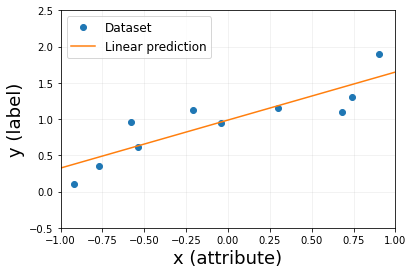

In [5]:
x_LS = np.linspace(-1,1,100).T
X_LS = np.column_stack([np.ones(x_LS.shape), x_LS])
y_LS = np.dot(X_LS, w)


plt.plot(x, y, 'o', label="Dataset")
plt.plot(x_LS, y_LS, label="Linear prediction")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

In [6]:
print(X_LS.shape)
print(y_LS.shape)
print(x_LS.shape)

(100, 2)
(100, 1)
(100,)


Let's do the same for a quadratic model. Note that our design matrix will include a new column with the squares of the predictors and instead of 2, we will have 3 parameters ($w_0$, $w_1$ and $w_2$):

The design matrix is:
 [[ 1.      0.3     0.09  ]
 [ 1.     -0.77    0.5929]
 [ 1.      0.9     0.81  ]
 [ 1.     -0.04    0.0016]
 [ 1.      0.74    0.5476]
 [ 1.     -0.58    0.3364]
 [ 1.     -0.92    0.8464]
 [ 1.     -0.21    0.0441]
 [ 1.     -0.54    0.2916]
 [ 1.      0.68    0.4624]]
The 3 parameters of the least squares quadratic solution are
 [[ 1.06606387]
 [ 0.66485629]
 [-0.19741535]]


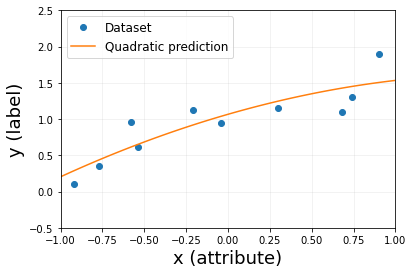

In [7]:
X = np.column_stack([np.ones(x.shape), x, x**2]) # Note we are including powers up to 2, the square of the predictors
print("The design matrix is:\n", X)

XTX = np.dot(X.T, X)
XTX_inv = np.linalg.inv(XTX)
XTX_invXT = np.dot(XTX_inv, X.T)

w = np.dot(XTX_invXT, y)
print("The 3 parameters of the least squares quadratic solution are\n", w)

X_LS = np.column_stack([np.ones(x_LS.shape), x_LS, x_LS**2])
y_LS = np.dot(X_LS, w)


plt.plot(x, y, 'o', label="Dataset")
plt.plot(x_LS, y_LS, label="Quadratic prediction")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

The least squares solution for a cubic model consists of four parameters and will be obtained in an identical fashion:

The design matrix is:
 [[ 1.00000e+00  3.00000e-01  9.00000e-02  2.70000e-02]
 [ 1.00000e+00 -7.70000e-01  5.92900e-01 -4.56533e-01]
 [ 1.00000e+00  9.00000e-01  8.10000e-01  7.29000e-01]
 [ 1.00000e+00 -4.00000e-02  1.60000e-03 -6.40000e-05]
 [ 1.00000e+00  7.40000e-01  5.47600e-01  4.05224e-01]
 [ 1.00000e+00 -5.80000e-01  3.36400e-01 -1.95112e-01]
 [ 1.00000e+00 -9.20000e-01  8.46400e-01 -7.78688e-01]
 [ 1.00000e+00 -2.10000e-01  4.41000e-02 -9.26100e-03]
 [ 1.00000e+00 -5.40000e-01  2.91600e-01 -1.57464e-01]
 [ 1.00000e+00  6.80000e-01  4.62400e-01  3.14432e-01]]
The 4 parameters of the least squares cubic solution are
 [[ 1.00363129]
 [-0.14490812]
 [-0.09075723]
 [ 1.32593586]]


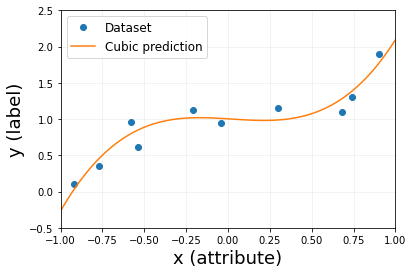

In [8]:
X = np.column_stack([np.ones(x.shape), x, x**2, x**3]) # Note we are including powers up to 3, the cube of the predictors
print("The design matrix is:\n", X)

XTX = np.dot(X.T, X)
XTX_inv = np.linalg.inv(XTX)
XTX_invXT = np.dot(XTX_inv, X.T)

w = np.dot(XTX_invXT, y)
print("The 4 parameters of the least squares cubic solution are\n", w)

X_LS = np.column_stack([np.ones(x_LS.shape), x_LS, x_LS**2, x_LS**3])
y_LS = np.dot(X_LS, w)


plt.plot(x, y, 'o', label="Dataset")
plt.plot(x_LS, y_LS, label="Cubic prediction")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

Finally, let's obtain the least squares solution of a polynomial of degree 4. However, lets put steps 1 to 3 into a single line of code:

The design matrix is:
 [[ 1.0000000e+00  3.0000000e-01  9.0000000e-02  2.7000000e-02
   8.1000000e-03]
 [ 1.0000000e+00 -7.7000000e-01  5.9290000e-01 -4.5653300e-01
   3.5153041e-01]
 [ 1.0000000e+00  9.0000000e-01  8.1000000e-01  7.2900000e-01
   6.5610000e-01]
 [ 1.0000000e+00 -4.0000000e-02  1.6000000e-03 -6.4000000e-05
   2.5600000e-06]
 [ 1.0000000e+00  7.4000000e-01  5.4760000e-01  4.0522400e-01
   2.9986576e-01]
 [ 1.0000000e+00 -5.8000000e-01  3.3640000e-01 -1.9511200e-01
   1.1316496e-01]
 [ 1.0000000e+00 -9.2000000e-01  8.4640000e-01 -7.7868800e-01
   7.1639296e-01]
 [ 1.0000000e+00 -2.1000000e-01  4.4100000e-02 -9.2610000e-03
   1.9448100e-03]
 [ 1.0000000e+00 -5.4000000e-01  2.9160000e-01 -1.5746400e-01
   8.5030560e-02]
 [ 1.0000000e+00  6.8000000e-01  4.6240000e-01  3.1443200e-01
   2.1381376e-01]]
The 5 parameters of the least squares 4-degree solution are
 [[ 1.09143992]
 [-0.20044224]
 [-0.93195169]
 [ 1.42527166]
 [ 1.01951151]]


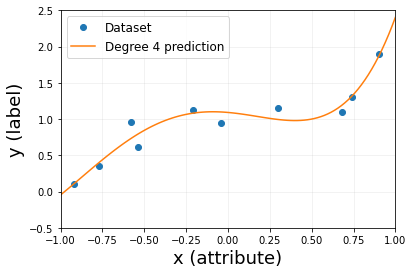

In [9]:
X = np.column_stack([np.ones(x.shape), x, x**2, x**3, x**4]) # Note we are including powers up to 4!
print("The design matrix is:\n", X)

w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)                         # Here they have calculated XTX_invXT in a single step
print("The 5 parameters of the least squares 4-degree solution are\n", w)

X_LS = np.column_stack([np.ones(x_LS.shape), x_LS, x_LS**2, x_LS**3, x_LS**4])
y_LS = np.dot(X_LS, w)


plt.plot(x, y, 'o', label="Dataset")
plt.plot(x_LS, y_LS, label="Degree 4 prediction")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

# Summary

In this notebook, we have covered several **operations** on NumPy arrays, specifically:

- **Arithmetic operations**: `+`, `-`, `*`, `/`, `**`. 
- **Transposition**: Given a matrix `X`, its transpose is `np.transpose(X)` and also `X.T`.
- **Column stacking**: Given several vectors with the same shape, for instance `x1`, `x2` and `x3`, they can be stacked together using `np.column_stack([x1, x2, x3])`.
- **Matrix multiplication**: Given two matrices `X` and `Y` (with the right dimensions!), we can multiply them by typing `np.dot(X,Y)`.
- **Matrix inversion**: The inverse of a matrix `X` can be obtained as `np.linalg.inv(X)`.

With these basic operations, and after representing our data as NumPy arrays, we have writen code to:

- Obtain the predicted label of a dataset consisting of any number of samples.
- Obtain the least square solution for linear and polynomial models.

